In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Coleta de Dados
Busque uma base de dados que seja apropriada para um problema de regressão linear simples. A base deve conter pelo menos uma variável dependente e uma variável independente.

In [2]:
#Essa base de dados contém dados de crédito de pessoas aleatórias
#Quero estabelecer uma relação entre o score de crédito da pessoa(variável dependent) com base no seu salário anual(variável independente)

df = pd.read_csv('credit_data.csv')
df = df[["Income", "Credit Score"]]
df

,Income,Credit Score
0,36000,604
1,50000,447
2,178000,850
3,46000,668
4,132000,601
...,...,...
279851,61000,495
279852,124000,850
279853,71000,582
279854,191000,411


# Pré-processamento de Dados
* **Elementos Faltantes:** Preencha ou remova quaisquer elementos faltantes na base de dados (caso existam).
* **Variáveis Categóricas:** Se houver variáveis categóricas, transforme-as em variáveis numéricas.
* **Normalização:** Normalize as variáveis se necessário.
* **Separação de Dados:** Divida a base em conjuntos de treino e teste.

In [3]:
print(f"Elementos faltantes:\n{df.isna().sum()}") #Não há elementos faltantes
#Não há variáveis categóricas
#A normalização nesse caso não é necessária, já que há apenas uma variável independete
XTrain, XTest, yTrain, yTest = train_test_split(df["Income"], df["Credit Score"], test_size = 0.8)

Elementos faltantes:
Income          0
Credit Score    0
dtype: int64


# Modelagem e Treino
Utilize a base de treino para criar e treinar um modelo de regressão linear simples.

In [4]:
#Regressão Linear
regressor = LinearRegression()
XTrain = pd.DataFrame(XTrain) #Aqui, o conteúdo de XTrain está em formato unidimensional(série), o método fit do regressor exige que XTrain tenha estrutura bidimensional(dataframe).
regressor.fit(XTrain, yTrain)



LinearRegression()

# Avaliação de Modelo

* Utilize a base de teste para fazer previsões.
* Calcule a métrica RMSE (Root Mean Square Error) para avaliar o desempenho do modelo.

In [5]:
XTest = pd.DataFrame(XTest)
yPred = regressor.predict(XTest) #Tipo array

dfResultado = pd.concat([XTest, yTest], axis=1)
dfResultado["Predição"] = yPred
print(dfResultado)

mse = mean_squared_error(dfResultado["Credit Score"], dfResultado["Predição"])
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}") #Ele quantifica a diferença entre os valores previstos pelo modelo e os valores reais dos dados.



        Income  Credit Score    Predição
106293   34000           625  548.556543
143114  112000           850  613.457951
16827   138000           714  635.091754
130478   91000           633  595.984495
229370   56000           598  566.862068
...        ...           ...         ...
144373   48000           672  560.205514
205376   55000           435  566.029999
191100   12000           306  530.251018
154507   48000           559  560.205514
113735   50000           610  561.869652

[223885 rows x 3 columns]
RMSE: 159.01081472360744


# Visualização

Gere um gráfico plotando os pontos do conjunto de teste e desenhe a reta de regressão gerada pelo modelo.

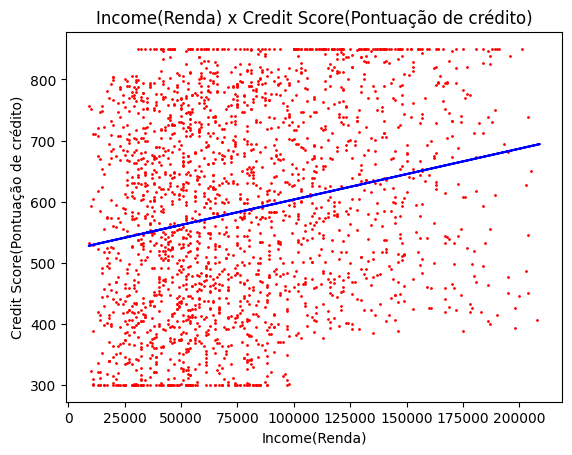

In [9]:
#plt.scatter(dfResultado["Income"], dfResultado["Credit Score"], color = 'red', s=1)
plt.scatter(dfResultado["Income"][::100], dfResultado["Credit Score"][::100], color = 'red', s=1) #[inicio:fim:step] 1% das amostras
plt.plot(dfResultado["Income"], dfResultado["Predição"], color='blue')
plt.title("Income(Renda) x Credit Score(Pontuação de crédito)")
plt.xlabel("Income(Renda)")
plt.ylabel("Credit Score(Pontuação de crédito)")
plt.show()

# Relatório

## Coleta de dados

* A base escolhida contém dados sobre análise de crédito de pessoas indianas. (https://www.kaggle.com/datasets/yashkmd/credit-profile-two-wheeler-loan-dataset)
* Nessa base, há diversos dados. Foram escolhidos apenas os dados renda anual(income) e pontuação(score), buscando observar como o score(variável dependente) depende da renda anual(variável independente).

## Pré-processamento de Dados

* Dados esses dois tipos de dados, não haviam elementos faltantes ou variáveis categóricas. 
* Como havia apenas um variável independente, não foi necessário normalizá-la. Se houvessem mais de uma seria necessário normalizá-las, pois caso tivessem escalas diferentes, a variável que apresentasse valores maiores iria sobressair sobre a que apresentasse valores menores.
* Quanto à separação de dados para treino e teste, não existe uma porcentagem única que seja a ideal para todos os casos, mas como diretrizes gerais, recomenda-se 70/30 ou 80/20, nesse caso, foi escolhido 80/20.

## Avaliação de Modelo

* Os dados apresentaram muito discrepância, de forma geral.
* O valor do RMSE é 159.102, isso quer dizer que, em média, os valores previstos variam em 159.102 para mais ou para menos do valor real.
* Considerando que o intervalo de valor do score vai de 300 a 850, esse erro é bem significativo.
* Em conclusão, levando em consideração quão pouco preciso foi esse modelo, podemos que concluir que, apenas a renda anual não é um bom parâmetro para medir o score, já que outros fatores também têm grande impacto sobre esse valor e medir apenas com esse parâmetro gera uma taxa de erro considerável.

## Visualização:

* Vendo o gráfico, podemos perceber o quanto os pontos ficam espalhados, confirmando que de fato, a ligação entre renda anual score é fraca, e seriam necessários levar em conta também outros dados para conseguir prever com maior precisão o valor de Score.